In [191]:
import pandas as pd
import random

In [192]:
random.seed(1)

altura = [1.4 + (random.random() * (2 - 1.4)) for _ in range(10)]
peso = [random.randrange(50, 150, 1) for i in range(10)]
idade = [random.randrange(18, 80, 1) for i in range(10)]

In [193]:
altura.sort()
peso.sort()
idade.sort(reverse=True)

In [194]:
#Criando o dataset

df_0 = pd.DataFrame({
    'id':list(range(0, 10)),
    'altura': altura,
    'peso': peso,
    'idade': idade
})

df_0

,id,altura,peso,idade
0,0,1.417008,50,78
1,1,1.456316,84,75
2,2,1.480619,99,69
3,3,1.553041,105,55
4,4,1.669695,107,38
5,5,1.697261,127,32
6,6,1.790956,139,24
7,7,1.858265,142,19
8,8,1.873234,147,19
9,9,1.908460,148,19


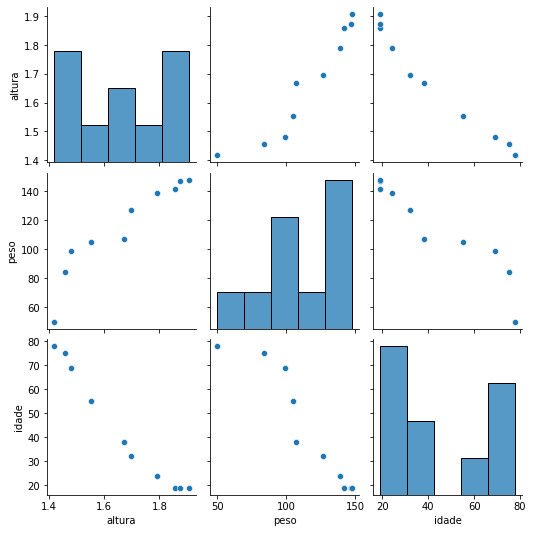

In [195]:
import seaborn as sns

sns.pairplot(df_0.drop(['id'], axis=1))

Eliminação manual de atributos

In [196]:
#df_0 = df_0.drop(['id'], axis=1) #Axis=0 linha, Axis=1 coluna
df_0

,id,altura,peso,idade
0,0,1.417008,50,78
1,1,1.456316,84,75
2,2,1.480619,99,69
3,3,1.553041,105,55
4,4,1.669695,107,38
5,5,1.697261,127,32
6,6,1.790956,139,24
7,7,1.858265,142,19
8,8,1.873234,147,19
9,9,1.908460,148,19


In [197]:
df_1 = pd.DataFrame({
    'id':list(range(0, 10)),
    'diabetes': ['nao', 'nao', 'sim', 'nao', 'nao', 'nao', 'sim', 'sim', 'nao', 'sim'],
    'sexo':['masculino', 'feminino', 'masculino', 'masculino', 'feminino', 'feminino', 'masculino', 'masculino', 'feminino', 'masculino']
})
df_1

,id,diabetes,sexo
0,0,nao,masculino
1,1,nao,feminino
2,2,sim,masculino
3,3,nao,masculino
4,4,nao,feminino
5,5,nao,feminino
6,6,sim,masculino
7,7,sim,masculino
8,8,nao,feminino
9,9,sim,masculino


In [198]:
#Fazer o merge de 2 datasets pandas

df = pd.merge(df_0, df_1, on='id')
df

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78,nao,masculino
1,1,1.456316,84,75,nao,feminino
2,2,1.480619,99,69,sim,masculino
3,3,1.553041,105,55,nao,masculino
4,4,1.669695,107,38,nao,feminino
5,5,1.697261,127,32,nao,feminino
6,6,1.790956,139,24,sim,masculino
7,7,1.858265,142,19,sim,masculino
8,8,1.873234,147,19,nao,feminino
9,9,1.908460,148,19,sim,masculino


Amostragem de dados:

In [199]:
df.sample(5) #Recupera 5 amostras de dentro do dataframe

,id,altura,peso,idade,diabetes,sexo
5,5,1.697261,127,32,nao,feminino
1,1,1.456316,84,75,nao,feminino
8,8,1.873234,147,19,nao,feminino
9,9,1.908460,148,19,sim,masculino
7,7,1.858265,142,19,sim,masculino


In [200]:
#Alterar uma coluna inteira do dataframe
df.diabetes = ['nao', 'sim', 'nao', 'sim', 'nao', 'nao', 'nao', 'sim', 'sim', 'nao']


In [201]:
df

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78,nao,masculino
1,1,1.456316,84,75,sim,feminino
2,2,1.480619,99,69,nao,masculino
3,3,1.553041,105,55,sim,masculino
4,4,1.669695,107,38,nao,feminino
5,5,1.697261,127,32,nao,feminino
6,6,1.790956,139,24,nao,masculino
7,7,1.858265,142,19,sim,masculino
8,8,1.873234,147,19,sim,feminino
9,9,1.908460,148,19,nao,masculino


In [202]:
df.diabetes.value_counts() #Mostra a ocorrencia de cada um dos dados.

nao    6
sim    4
Name: diabetes, dtype: int64

Undersampling

Remove dados dados mais recorrentes para compensar o desbalanceamento

In [203]:
df[df['diabetes']=='nao'] #Filtra todos os dados aonde diabetes==nao


tmp_0 = df[df['diabetes']=='sim']
n= len(tmp_0)
tmp_1 = df[df['diabetes']=='nao'].sample(n)

df_under = pd.concat([tmp_0, tmp_1])
df_under

,id,altura,peso,idade,diabetes,sexo
1,1,1.456316,84,75,sim,feminino
3,3,1.553041,105,55,sim,masculino
7,7,1.858265,142,19,sim,masculino
8,8,1.873234,147,19,sim,feminino
9,9,1.908460,148,19,nao,masculino
0,0,1.417008,50,78,nao,masculino
6,6,1.790956,139,24,nao,masculino
5,5,1.697261,127,32,nao,feminino


Oversampling

In [204]:
tmp_0 = df[df['diabetes'] == 'nao']
tmp_1 = df[df['diabetes'] == 'sim'].sample(len(tmp_0), replace=True, random_state=1)
df_over = pd.concat([tmp_0, tmp_1])
df_over

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78,nao,masculino
2,2,1.480619,99,69,nao,masculino
4,4,1.669695,107,38,nao,feminino
5,5,1.697261,127,32,nao,feminino
6,6,1.790956,139,24,nao,masculino
9,9,1.908460,148,19,nao,masculino
3,3,1.553041,105,55,sim,masculino
8,8,1.873234,147,19,sim,feminino
1,1,1.456316,84,75,sim,feminino
1,1,1.456316,84,75,sim,feminino


In [205]:
#Acertando os indices

df_over = df_over.reset_index()
df_over = df_over.drop(['index'], axis=1)
df_over

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78,nao,masculino
1,2,1.480619,99,69,nao,masculino
2,4,1.669695,107,38,nao,feminino
3,5,1.697261,127,32,nao,feminino
4,6,1.790956,139,24,nao,masculino
5,9,1.908460,148,19,nao,masculino
6,3,1.553041,105,55,sim,masculino
7,8,1.873234,147,19,sim,feminino
8,1,1.456316,84,75,sim,feminino
9,1,1.456316,84,75,sim,feminino


# DADOS FALTANTES

In [206]:
import numpy as np
import warnings

warnings.filterwarnings('ignore')
df.idade[3] = np.nan
df

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78.0,nao,masculino
1,1,1.456316,84,75.0,sim,feminino
2,2,1.480619,99,69.0,nao,masculino
3,3,1.553041,105,NaN,sim,masculino
4,4,1.669695,107,38.0,nao,feminino
5,5,1.697261,127,32.0,nao,feminino
6,6,1.790956,139,24.0,nao,masculino
7,7,1.858265,142,19.0,sim,masculino
8,8,1.873234,147,19.0,sim,feminino
9,9,1.908460,148,19.0,nao,masculino


In [207]:
#Eliminar dados faltantes

df.dropna() #Remove a linha de dados que contem dados faltantes

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78.0,nao,masculino
1,1,1.456316,84,75.0,sim,feminino
2,2,1.480619,99,69.0,nao,masculino
4,4,1.669695,107,38.0,nao,feminino
5,5,1.697261,127,32.0,nao,feminino
6,6,1.790956,139,24.0,nao,masculino
7,7,1.858265,142,19.0,sim,masculino
8,8,1.873234,147,19.0,sim,feminino
9,9,1.908460,148,19.0,nao,masculino


Preencher manualmente, podemos usar a média, a mediana ou técnicas mais avançadas

In [208]:
df.idade[3] = 55
df

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78.0,nao,masculino
1,1,1.456316,84,75.0,sim,feminino
2,2,1.480619,99,69.0,nao,masculino
3,3,1.553041,105,55.0,sim,masculino
4,4,1.669695,107,38.0,nao,feminino
5,5,1.697261,127,32.0,nao,feminino
6,6,1.790956,139,24.0,nao,masculino
7,7,1.858265,142,19.0,sim,masculino
8,8,1.873234,147,19.0,sim,feminino
9,9,1.908460,148,19.0,nao,masculino


Ruído nos dados

Exemplo: outliers

In [209]:
df.idade[3] = 500
df

,id,altura,peso,idade,diabetes,sexo
0,0,1.417008,50,78.0,nao,masculino
1,1,1.456316,84,75.0,sim,feminino
2,2,1.480619,99,69.0,nao,masculino
3,3,1.553041,105,500.0,sim,masculino
4,4,1.669695,107,38.0,nao,feminino
5,5,1.697261,127,32.0,nao,feminino
6,6,1.790956,139,24.0,nao,masculino
7,7,1.858265,142,19.0,sim,masculino
8,8,1.873234,147,19.0,sim,feminino
9,9,1.908460,148,19.0,nao,masculino


<AxesSubplot:xlabel='idade'>

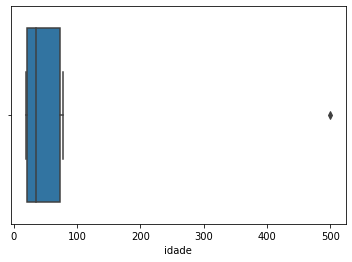

In [210]:
sns.boxplot(df.idade)  #Visualizar outliers com boxplots

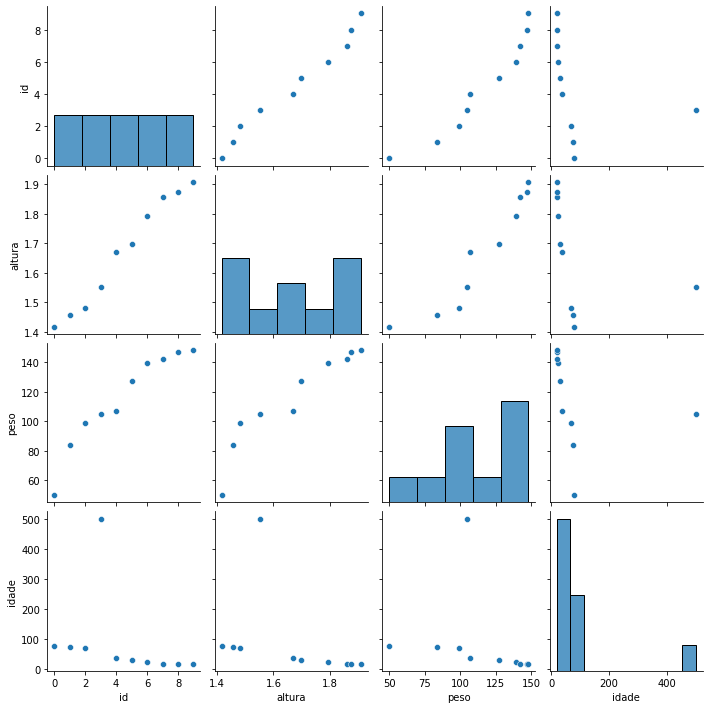

In [211]:
sns.pairplot(df) #outliers distorce todos os dados

In [212]:
q1 = df.idade.quantile(0.25)
q3 = df.idade.quantile(0.75)
iqr = q3 - q1
iqr

53.25

In [213]:
(df.idade > (q1 - 1.5 * iqr)) & (df.idade < (q3 + 1.5 * iqr))  #Retornar os valores que estão fora do limite. 
                                                               #Outliers

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7     True
8     True
9     True
Name: idade, dtype: bool

In [214]:
df[(df.idade < (q1 - 1.5 * iqr)) | (df.idade > (q3 + 1.5 * iqr))]  #Retorna a linha com os dados outliers

,id,altura,peso,idade,diabetes,sexo
3,3,1.553041,105,500.0,sim,masculino


-------------------------------------------------------------------------------------------------------

In [215]:
#SCIKIT LEARN

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit_transform(df[['diabetes']])

array([[0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [216]:
df['diabetes'] = oe.fit_transform(df[['diabetes']])

In [217]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

res = ohe.fit_transform(df[['sexo']])
res #MATRIX ESPARÇA. Para economizar espaço os ítens em zero nao são sempre armazenados

<10x2 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [218]:
res.toarray() #0,1 -> masculino
              #1,0 -> feminino

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [219]:
tmp = pd.DataFrame(res.toarray(), columns=['feminino', 'masculino'])
tmp
df = pd.merge(df, tmp, left_index=True, right_index=True)
df = df.drop(['sexo'], axis=1)
df

,id,altura,peso,idade,diabetes,feminino,masculino
0,0,1.417008,50,78.0,0.0,0.0,1.0
1,1,1.456316,84,75.0,1.0,1.0,0.0
2,2,1.480619,99,69.0,0.0,0.0,1.0
3,3,1.553041,105,500.0,1.0,0.0,1.0
4,4,1.669695,107,38.0,0.0,1.0,0.0
5,5,1.697261,127,32.0,0.0,1.0,0.0
6,6,1.790956,139,24.0,0.0,0.0,1.0
7,7,1.858265,142,19.0,1.0,0.0,1.0
8,8,1.873234,147,19.0,1.0,1.0,0.0
9,9,1.908460,148,19.0,0.0,0.0,1.0


Conversão numérico simbólico

conversão de idade para idoso, adulto ou criança

In [222]:
arr = [print('idoso' if x else 'adulto') for x in (df.idade > 60).tolist()]
arr

idoso
idoso
idoso
idoso
adulto
adulto
adulto
adulto
adulto
adulto


[None, None, None, None, None, None, None, None, None, None]

In [224]:
(df.peso - df.peso.min()) / (df.peso.max() - df.peso.min())

0    0.000000
1    0.346939
2    0.500000
3    0.561224
4    0.581633
5    0.785714
6    0.908163
7    0.938776
8    0.989796
9    1.000000
Name: peso, dtype: float64

In [225]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df[['peso']])

array([[0.        ],
       [0.34693878],
       [0.5       ],
       [0.56122449],
       [0.58163265],
       [0.78571429],
       [0.90816327],
       [0.93877551],
       [0.98979592],
       [1.        ]])

In [226]:
df.peso = scaler.fit_transform(df[['peso']])
df

,id,altura,peso,idade,diabetes,feminino,masculino
0,0,1.417008,0.000000,78.0,0.0,0.0,1.0
1,1,1.456316,0.346939,75.0,1.0,1.0,0.0
2,2,1.480619,0.500000,69.0,0.0,0.0,1.0
3,3,1.553041,0.561224,500.0,1.0,0.0,1.0
4,4,1.669695,0.581633,38.0,0.0,1.0,0.0
5,5,1.697261,0.785714,32.0,0.0,1.0,0.0
6,6,1.790956,0.908163,24.0,0.0,0.0,1.0
7,7,1.858265,0.938776,19.0,1.0,0.0,1.0
8,8,1.873234,0.989796,19.0,1.0,1.0,0.0
9,9,1.908460,1.000000,19.0,0.0,0.0,1.0
